## Carga de módulos

In [1]:
import warnings
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from utilities.utils import normal_test, calculate_vif

warnings.filterwarnings(action="ignore")
pd.set_option("float_format", '{:.2f}'.format)

In [2]:
# housing = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/DS-ONLINE-76/master/data/housing.csv")
housing = pd.read_csv("data/housing.csv")
print(f"El set de datos tiene {housing.shape[0]} observaciones, y {housing.shape[1]} columnas.")
housing.head()

El set de datos tiene 20640 observaciones, y 10 columnas.


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88               41.00       880.00          129.00   
1    -122.22     37.86               21.00      7099.00         1106.00   
2    -122.24     37.85               52.00      1467.00          190.00   
3    -122.25     37.85               52.00      1274.00          235.00   
4    -122.25     37.85               52.00      1627.00          280.00   

   population  households  median_income  median_house_value ocean_proximity  
0      322.00      126.00           8.33           452600.00        NEAR BAY  
1     2401.00     1138.00           8.30           358500.00        NEAR BAY  
2      496.00      177.00           7.26           352100.00        NEAR BAY  
3      558.00      219.00           5.64           341300.00        NEAR BAY  
4      565.00      259.00           3.85           342200.00        NEAR BAY

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Estadísticas descriptivas

In [4]:
housing.describe()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count   20640.00  20640.00            20640.00     20640.00        20433.00   
mean     -119.57     35.63               28.64      2635.76          537.87   
std         2.00      2.14               12.59      2181.62          421.39   
min      -124.35     32.54                1.00         2.00            1.00   
25%      -121.80     33.93               18.00      1447.75          296.00   
50%      -118.49     34.26               29.00      2127.00          435.00   
75%      -118.01     37.71               37.00      3148.00          647.00   
max      -114.31     41.95               52.00     39320.00         6445.00   

       population  households  median_income  median_house_value  
count    20640.00    20640.00       20640.00            20640.00  
mean      1425.48      499.54           3.87           206855.82  
std       1132.46      382.33           1.90           115395.62  
min          3.00        1.00           0.50            14999.00  
25%        787.00      280.00           2.56           119600.00  
50%       1166.00      409.00           3.53           179700.00  
75%       1725.00      605.00           4.74           264725.00  
max      35682.00     6082.00          15.00           500001.00

* Parece que **housing_median_age**, **median_income**, y tal vez **household** son normales.
* Las demás variables deben tener un sesgo positivo o negativo.

In [5]:
housing.describe(exclude="number")

ocean_proximity
count            20640
unique               5
top          <1H OCEAN
freq              9136

### Datos missing

<AxesSubplot:>

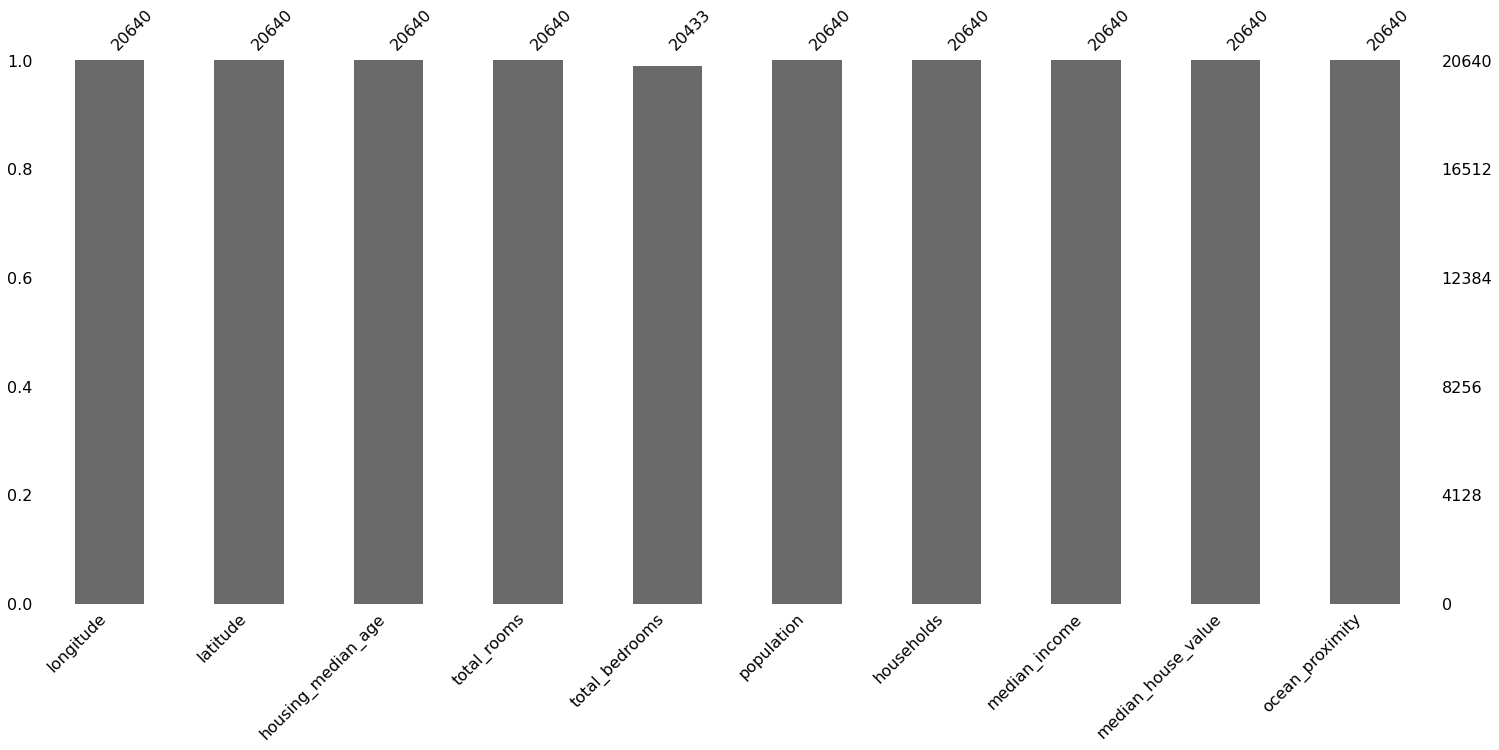

In [6]:
msno.bar(df=housing)

<AxesSubplot:>

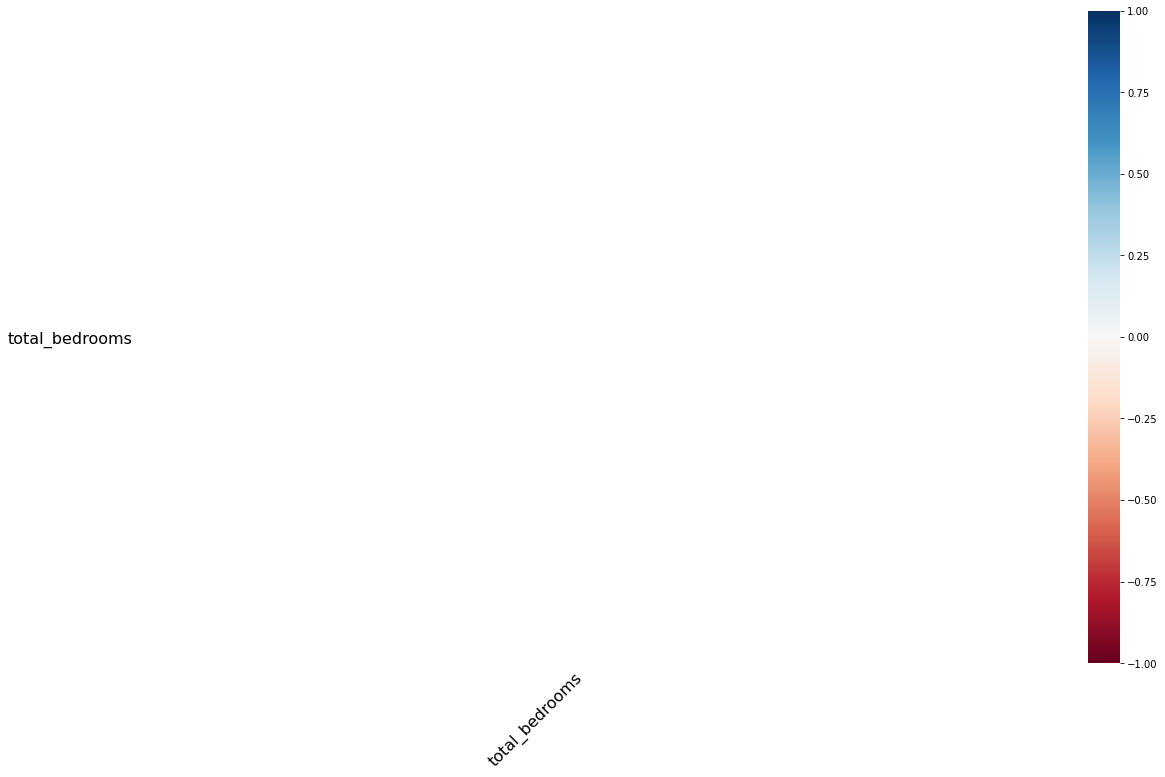

In [7]:
msno.heatmap(df=housing)

## Análisis exploratorio de datos

### Análisis univariado

* Numéricas (histograma, boxplot, ecdf, etc).
* Categóricas (Gráficos de barras)

### Análisis bivariado

Quiero encontrar si existe relación o asociación entre un par de variables.

* Continuas vs continuas (Scatterplot)
* Continuas vs categóricas (Boxplot, Pointplot, Coordenadas paralelas)
* Categóricas vs categóricas (Tablas de contingencia, la matriz de calor de la tabla de contingencia)

### Análisis multivariado

Quiero ver como se relacionan todas las variables.

* Clustering
* Técnicas de reducción de la dimensionalidad.

## Análisis Univariado

In [8]:
cols_to_drop = ["longitude", "latitude"]

housing.drop(labels=cols_to_drop, axis="columns", inplace=True)

In [9]:
numerical_features = housing.select_dtypes(include="number").columns.tolist()
categorical_features = [col for col in housing.columns if col not in numerical_features]

In [10]:
import seaborn as sns

La variable housing_median_age: 



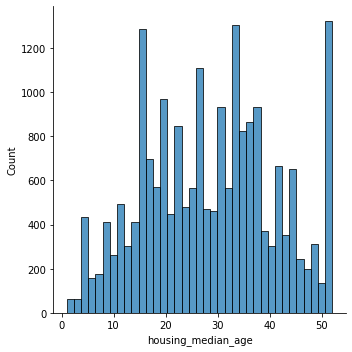

-----------------------------------------------------------------------------------------------------------
La variable total_rooms: 



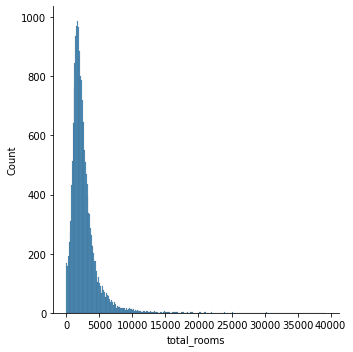

-----------------------------------------------------------------------------------------------------------
La variable total_bedrooms: 



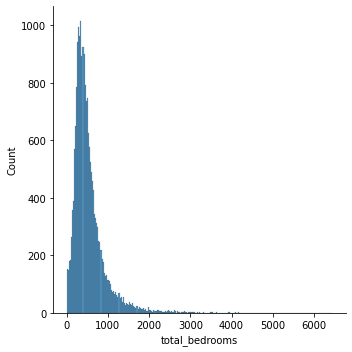

-----------------------------------------------------------------------------------------------------------
La variable population: 



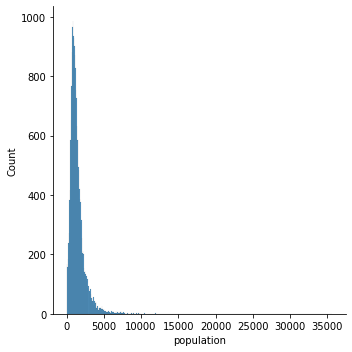

-----------------------------------------------------------------------------------------------------------
La variable households: 



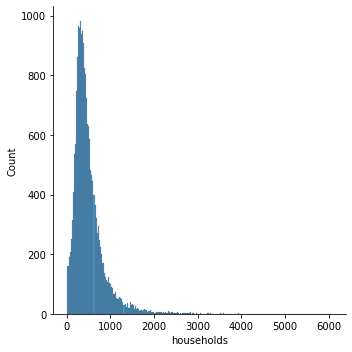

-----------------------------------------------------------------------------------------------------------
La variable median_income: 



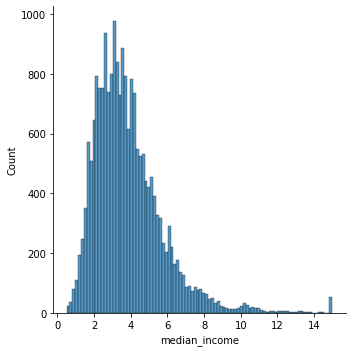

-----------------------------------------------------------------------------------------------------------
La variable median_house_value: 



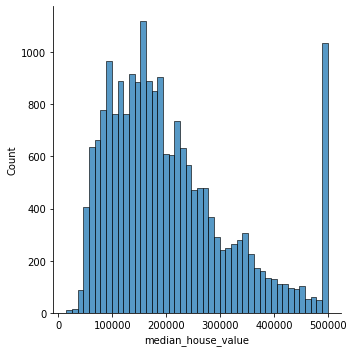

-----------------------------------------------------------------------------------------------------------


In [11]:
for col in numerical_features:
    print(f"La variable {col}: \n")
    sns.displot(data=housing, x=col)
    plt.show()
    print("-----------------------------------------------------------------------------------------------------------")

In [12]:
for col in numerical_features:
    print(f"Para la variable {col}")
    normal_test(data=housing.dropna(), column=col, method="anderson")
    print("----------------------------------------------------------------------------------------------------------- \n")

Para la variable housing_median_age
Para housing_median_age con la prueba de Anderson-Darling: 

Estadistico: 87
Para un nivel de significancia: 5.0 y un valor critico de: 0.787 
La muestra no parece Gaussiana (Se rechaza H0).
----------------------------------------------------------------------------------------------------------- 

Para la variable total_rooms
Para total_rooms con la prueba de Anderson-Darling: 

Estadistico: 1243
Para un nivel de significancia: 5.0 y un valor critico de: 0.787 
La muestra no parece Gaussiana (Se rechaza H0).
----------------------------------------------------------------------------------------------------------- 

Para la variable total_bedrooms
Para total_bedrooms con la prueba de Anderson-Darling: 

Estadistico: 1113
Para un nivel de significancia: 5.0 y un valor critico de: 0.787 
La muestra no parece Gaussiana (Se rechaza H0).
----------------------------------------------------------------------------------------------------------- 

Para la

## Bivariado

### Continuas vs Continuas

Vamos a verificar si existe una relación o asociación entre las variables numéricas y nuestra variable objetivo

La relación entre housing_median_age y median house value: 



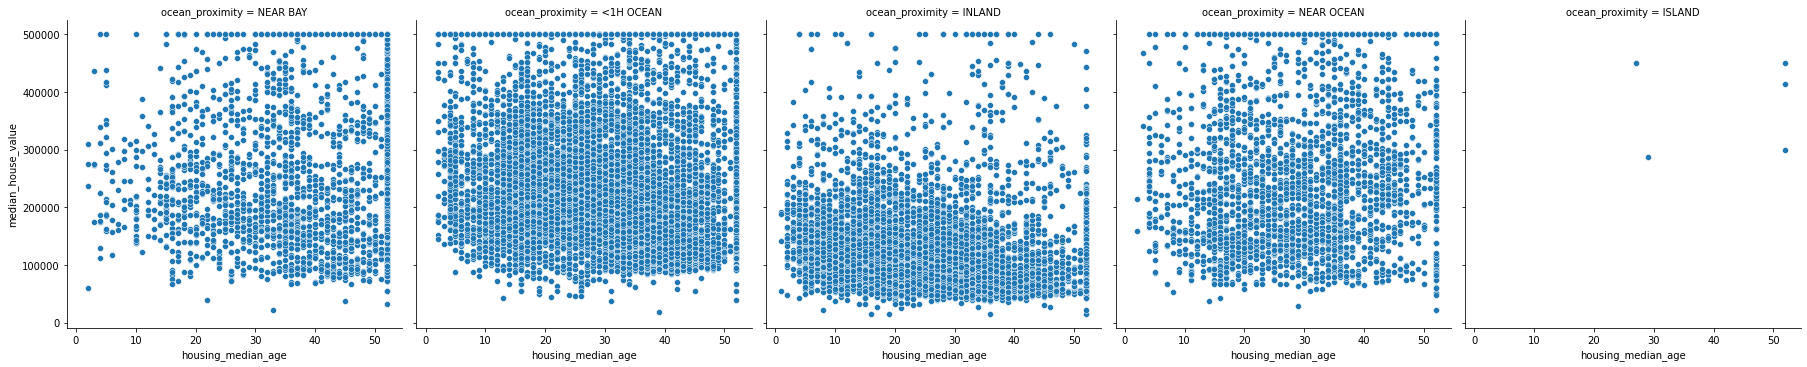

La relación entre total_rooms y median house value: 



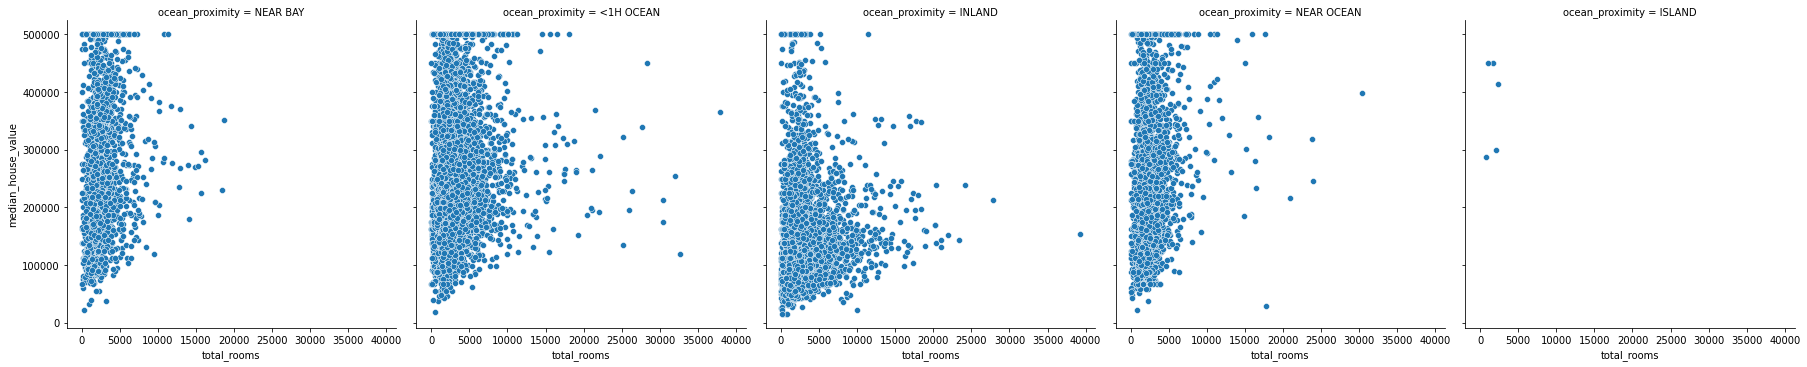

La relación entre total_bedrooms y median house value: 



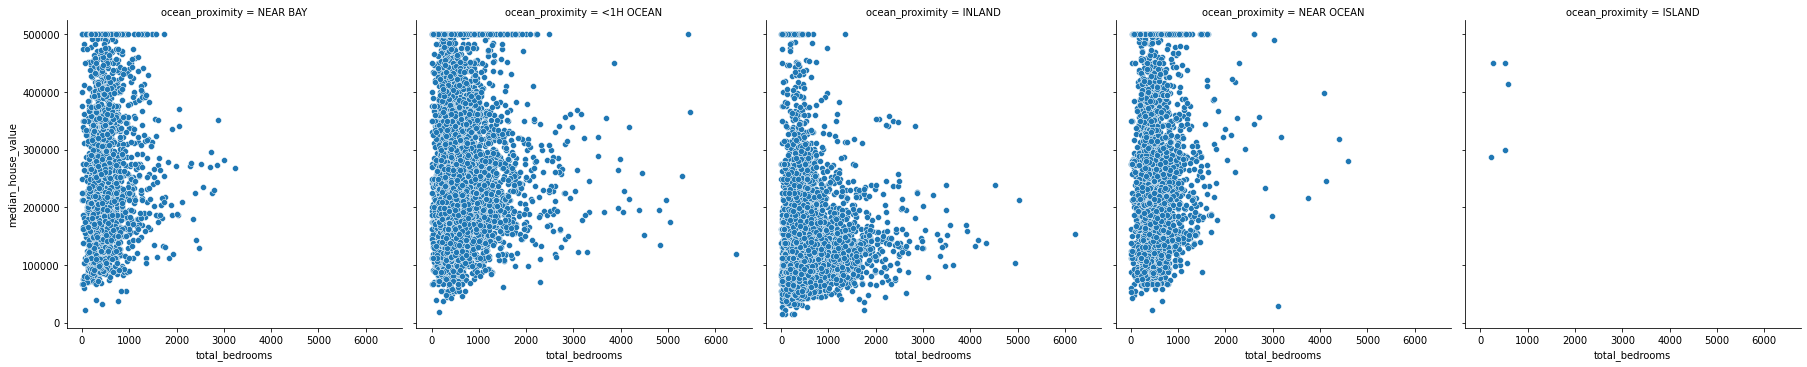

La relación entre population y median house value: 



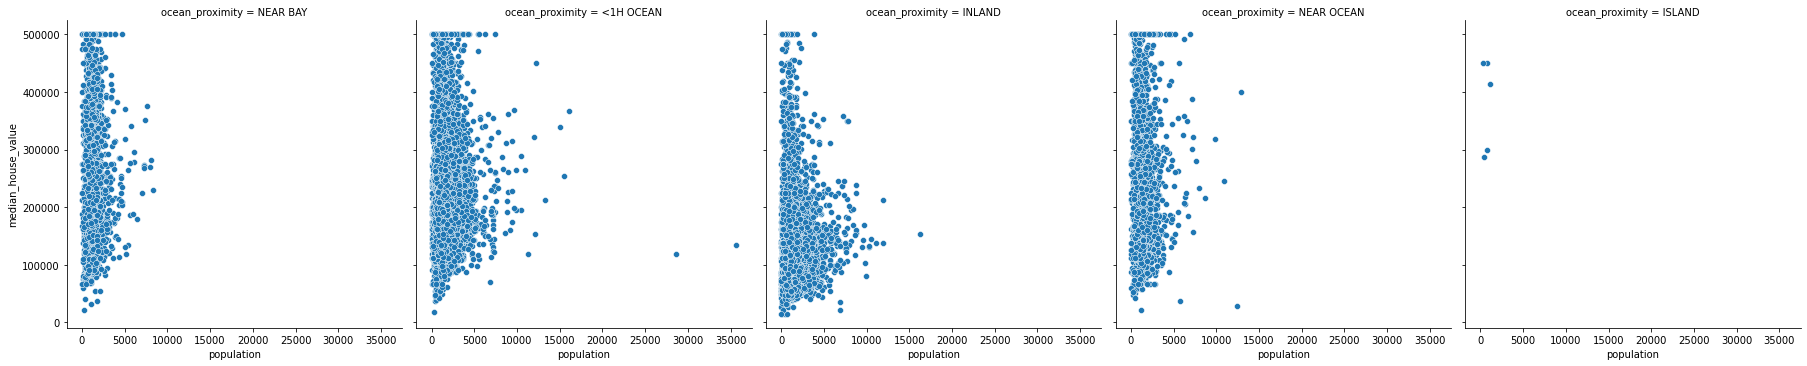

La relación entre households y median house value: 



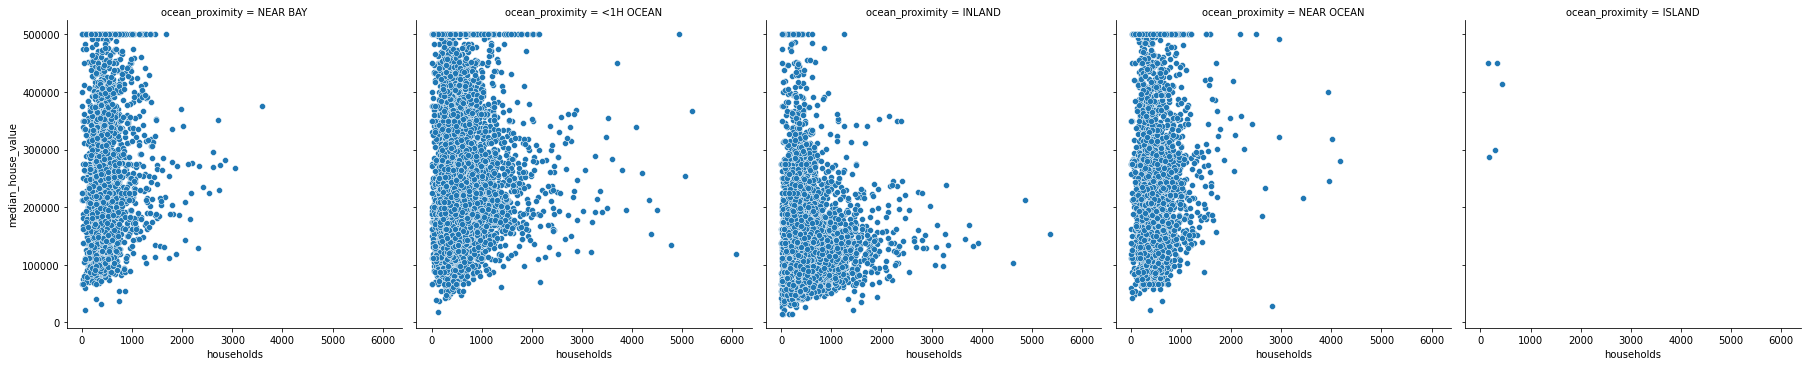

La relación entre median_income y median house value: 



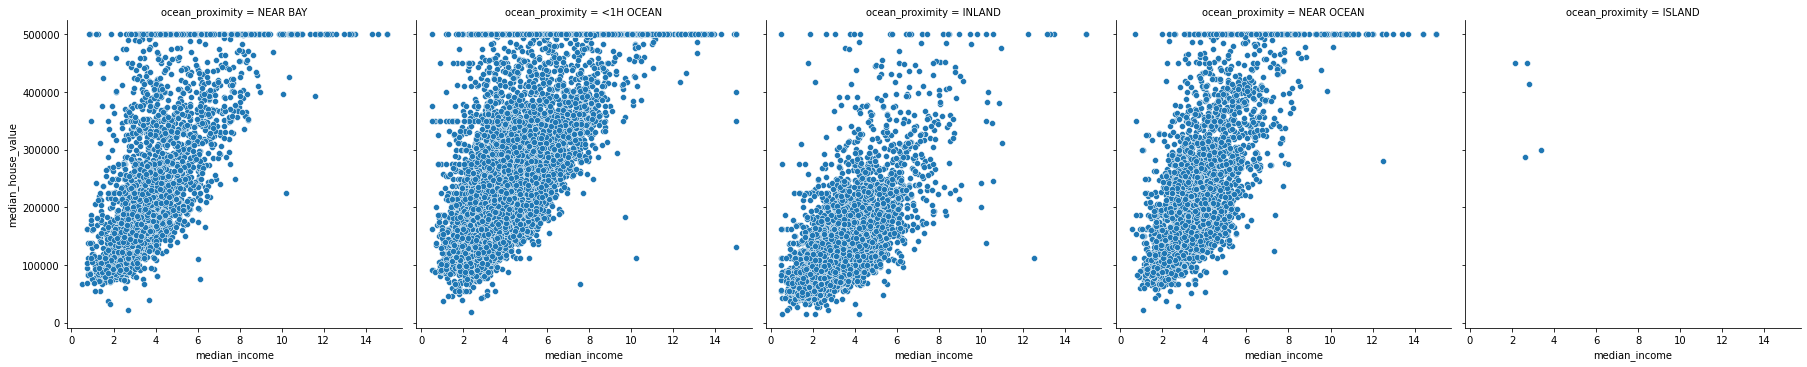

In [13]:
for col in numerical_features:
    if col != "median_house_value":
        print(f"La relación entre {col} y median house value: \n")
        sns.relplot(data=housing, x=col, y="median_house_value",
                    kind="scatter", col="ocean_proximity")
        plt.show()

* Según lo anterior vemos que parece haber una relación o asociación lineal no muy fuerte entre **median_income** discriminada por **ocean_proximity** con respecto a nuestra variable objetivo **median_house_value**.
* No parece haber una relación lineal entre las demás variables numéricas con respecto a nuestra variable objetivo.

### Categórica vs Continua

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

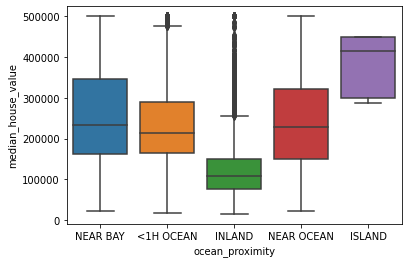

In [14]:
sns.boxplot(data=housing, x="ocean_proximity", y="median_house_value")

### Correlación entre variables

<AxesSubplot:>

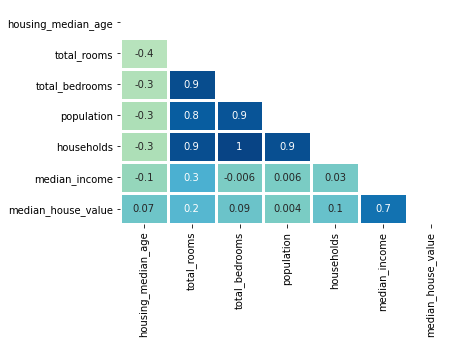

In [15]:
correlacion = housing.corr(method="spearman")

mask = np.triu(correlacion)

sns.heatmap(correlacion, annot=True, fmt=".1g", cbar=False,
            vmin=-1, vmax=1, linecolor="w", linewidths=3, mask=mask, cmap="GnBu")

In [16]:
# !pip install statsmodels

In [17]:
data = pd.get_dummies(data=housing.drop("median_house_value", axis=1),
                      columns=categorical_features, drop_first=True)

vif = calculate_vif(data=data.dropna())
vif

feature   VIF
0          housing_median_age  4.18
1                 total_rooms 27.78
2              total_bedrooms 87.83
3                  population 15.93
4                  households 92.73
5               median_income  4.85
6      ocean_proximity_INLAND  1.51
7      ocean_proximity_ISLAND  1.00
8    ocean_proximity_NEAR BAY  1.34
9  ocean_proximity_NEAR OCEAN  1.26

* **total_rooms**, **total_bedrooms**, **population** y **households** son variables que hacen que tengamos un problema de multicolinealidad.

##### ¿Cómo corregir multicolinealidad?

Para corregir multicolinealidad si mi tarea es un ejercicio de inferencia (es decir, me interesa saber como afectan mis variables independientes a mi variable objetivo) eliminamos algunas de las variables.

Podemos eliminar utilizando técnicas de selección de características:

* De lo general a lo particular (Solo usar cuando mi enfoque es inferencia)
* De lo particular a lo general (Solo usar cuando mi enfoque es inferencia)
* **Regularización** (Ridge, Lasso) (Enfoque sea predicción)

## Análisis multivariado

* Clustering
* Reducción de la dimensionalidad

### Clustering

Vamos a aplicar clustering sobre todas las variables.

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [19]:
imputer = KNNImputer()
scaler = RobustScaler()

X = imputer.fit_transform(housing[numerical_features])
X = pd.DataFrame(scaler.fit_transform(X), columns=numerical_features)
X.head()

housing_median_age  total_rooms  total_bedrooms  population  households  \
0                0.63        -0.73           -0.87       -0.90       -0.87   
1               -0.42         2.92            1.91        1.32        2.24   
2                1.21        -0.39           -0.70       -0.71       -0.71   
3                1.21        -0.50           -0.57       -0.65       -0.58   
4                1.21        -0.29           -0.44       -0.64       -0.46   

   median_income  median_house_value  
0           2.20                1.88  
1           2.19                1.23  
2           1.71                1.19  
3           0.97                1.11  
4           0.14                1.12

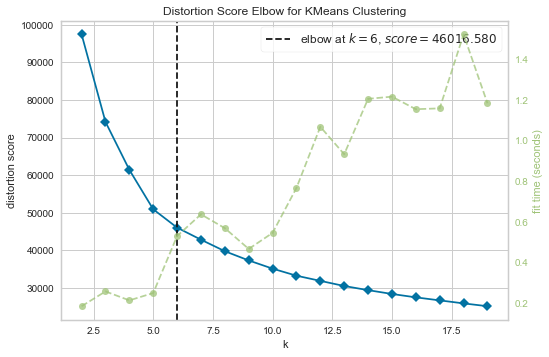

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
kmeans = KMeans(random_state=42)

visualizer = KElbowVisualizer(estimator=kmeans, k=(2, 20)).fit(X)
visualizer.show()

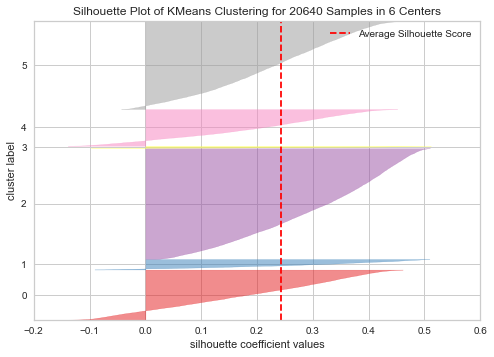

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20640 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
kmeans = KMeans(n_clusters=6, random_state=42)

silhouette = SilhouetteVisualizer(estimator=kmeans).fit(X)
silhouette.show()

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

pca_output = pd.DataFrame(pca.fit_transform(X), columns=["PC1", "PC2"])
pca_output["cluster"] = pd.Series(kmeans.predict(X)).apply(lambda x: f"cluster_{int(x + 1)}")
pca_output.head()

PC1  PC2    cluster
0 -2.21 2.72  cluster_1
1  3.76 2.23  cluster_5
2 -1.86 1.92  cluster_1
3 -1.79 1.28  cluster_1
4 -1.58 0.69  cluster_3

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

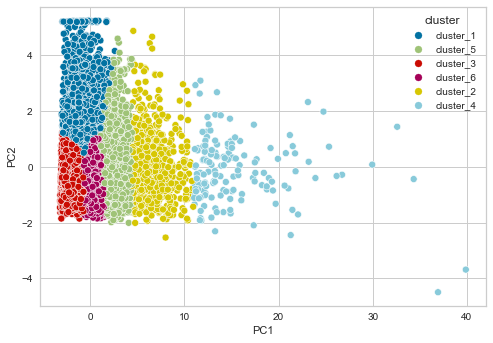

In [24]:
sns.scatterplot(data=pca_output, x="PC1", y="PC2", hue="cluster")

In [25]:
X.loc[:, numerical_features] = scaler.inverse_transform(X)
X["cluster"] = pca_output["cluster"]
X.head()

housing_median_age  total_rooms  total_bedrooms  population  households  \
0               41.00       880.00          129.00      322.00      126.00   
1               21.00      7099.00         1106.00     2401.00     1138.00   
2               52.00      1467.00          190.00      496.00      177.00   
3               52.00      1274.00          235.00      558.00      219.00   
4               52.00      1627.00          280.00      565.00      259.00   

   median_income  median_house_value    cluster  
0           8.33           452600.00  cluster_1  
1           8.30           358500.00  cluster_5  
2           7.26           352100.00  cluster_1  
3           5.64           341300.00  cluster_1  
4           3.85           342200.00  cluster_3

In [26]:
table = np.round(X.groupby(by="cluster").mean(), 2).reset_index()

In [27]:
from utilities.plotting import radar_chart
from sklearn.preprocessing import MinMaxScaler

In [28]:
minmax = MinMaxScaler()

X.loc[:, numerical_features] = minmax.fit_transform(X[numerical_features])
X.head(2)

housing_median_age  total_rooms  total_bedrooms  population  households  \
0                0.78         0.02            0.02        0.01        0.02   
1                0.39         0.18            0.17        0.07        0.19   

   median_income  median_house_value    cluster  
0           0.54                0.90  cluster_1  
1           0.54                0.71  cluster_5

In [29]:
radar_chart(df=X, columns=numerical_features, label="cluster", title="Comportamiento de los clusters")

### PCA + Clustering

In [30]:
imputer = KNNImputer()
scaler = RobustScaler()

X1 = imputer.fit_transform(housing[numerical_features])
X1 = pd.DataFrame(scaler.fit_transform(X1), columns=numerical_features)

In [31]:
pca = PCA().fit(X1)

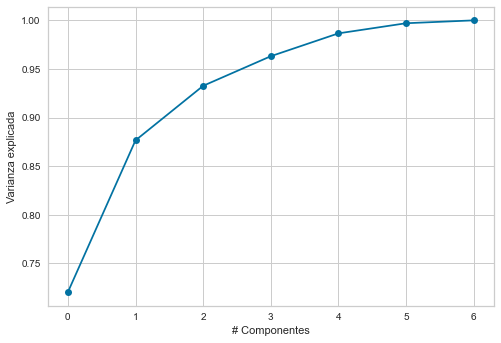

In [32]:
variance = pca.explained_variance_ratio_.cumsum()

plt.plot(range(0, len(variance)), variance, marker='o')
plt.xlabel("# Componentes")
plt.ylabel('Varianza explicada')
plt.show()

In [33]:
pca = PCA(n_components=3, random_state=42).fit(X1)

In [34]:
pd.DataFrame(data=pca.components_,
             columns=X1.columns,
             index=['PC1', 'PC2', 'PC3'])

housing_median_age  total_rooms  total_bedrooms  population  households  \
PC1               -0.10         0.52            0.50        0.48        0.49   
PC2               -0.00         0.14           -0.07       -0.11       -0.05   
PC3                0.89        -0.11            0.10        0.06        0.14   

     median_income  median_house_value  
PC1           0.03                0.02  
PC2           0.74                0.64  
PC3          -0.24                0.34

Podemos el vector que forma cada componente para ayudar a interpretar que tipo de información recoge cada uno. Así las cosas tenemos:

${PC1} = -0.10 housingMedianAge + 0.52 totalRooms + 0.5 totalBedrooms + 0.48 population + 0.49 households + 0.03 medianIncome + 0.02 medianHouseValue$

${PC2} = -0.0 housingMedianAge + 0.14 totalRooms -0.07 totalBedrooms - 0.11 population - 0.05 households + 0.74 medianIncome + 0.64 medianHouseValue$

${PC3} = 0.89 housingMedianAge - 0.11 totalRooms + 0.1 totalBedrooms + 0.06 population + 0.14 households - 0.24 medianIncome + 0.34 medianHouseValue$

In [35]:
table = pd.DataFrame(data=pca.components_,
                     columns=X1.columns,
                     index=['PC1', 'PC2', 'PC3']).T

table["loading"] = table.idxmax(axis=1)
table.sort_values(by="loading", inplace=True)
table

PC1   PC2   PC3 loading
total_rooms         0.52  0.14 -0.11     PC1
total_bedrooms      0.50 -0.07  0.10     PC1
population          0.48 -0.11  0.06     PC1
households          0.49 -0.05  0.14     PC1
median_income       0.03  0.74 -0.24     PC2
median_house_value  0.02  0.64  0.34     PC2
housing_median_age -0.10 -0.00  0.89     PC3

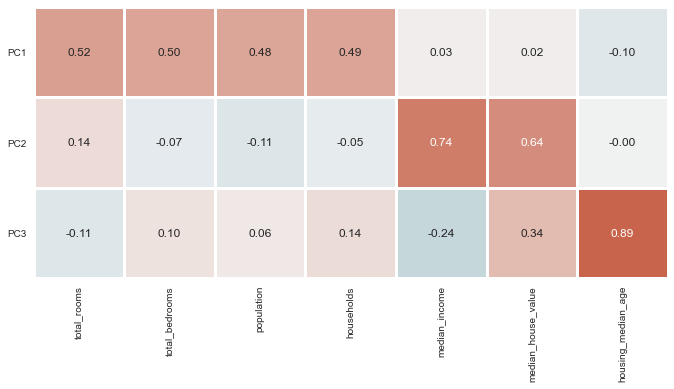

In [36]:
plt.figure(figsize=(25, 5))

ax = sns.heatmap(table.drop(labels=["loading"], axis=1).T,
                 vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt=".2f", linecolor="w", linewidths=3, cbar=False)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0
)
plt.show()

In [37]:
X1 = pd.DataFrame(pca.transform(X1), columns=["PC1", "PC2", "PC3"])

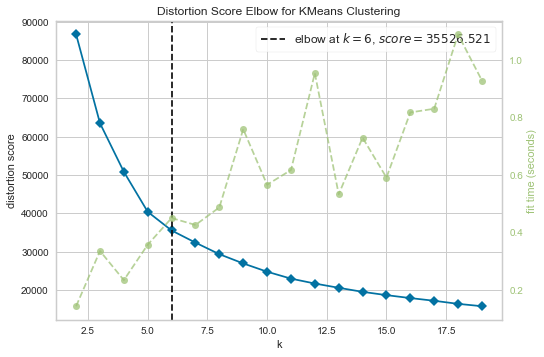

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
kmeans = KMeans(random_state=42)

visualizer = KElbowVisualizer(estimator=kmeans, k=(2, 20)).fit(X1)
visualizer.show()

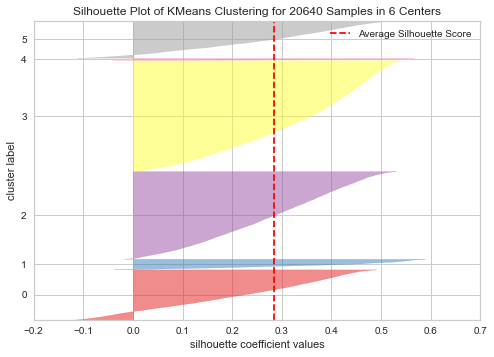

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20640 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
kmeans = KMeans(n_clusters=6, random_state=42)

silhouette = SilhouetteVisualizer(estimator=kmeans).fit(X1)
silhouette.show()

In [40]:
X1["cluster"] = pd.Series(kmeans.predict(X1)).apply(lambda x: f"cluster_{int(x + 1)}")

In [41]:
colors = {key: value for key, value in zip(sorted(X1["cluster"].unique()), ["r", "g", "b", "y", "k", "c"])}

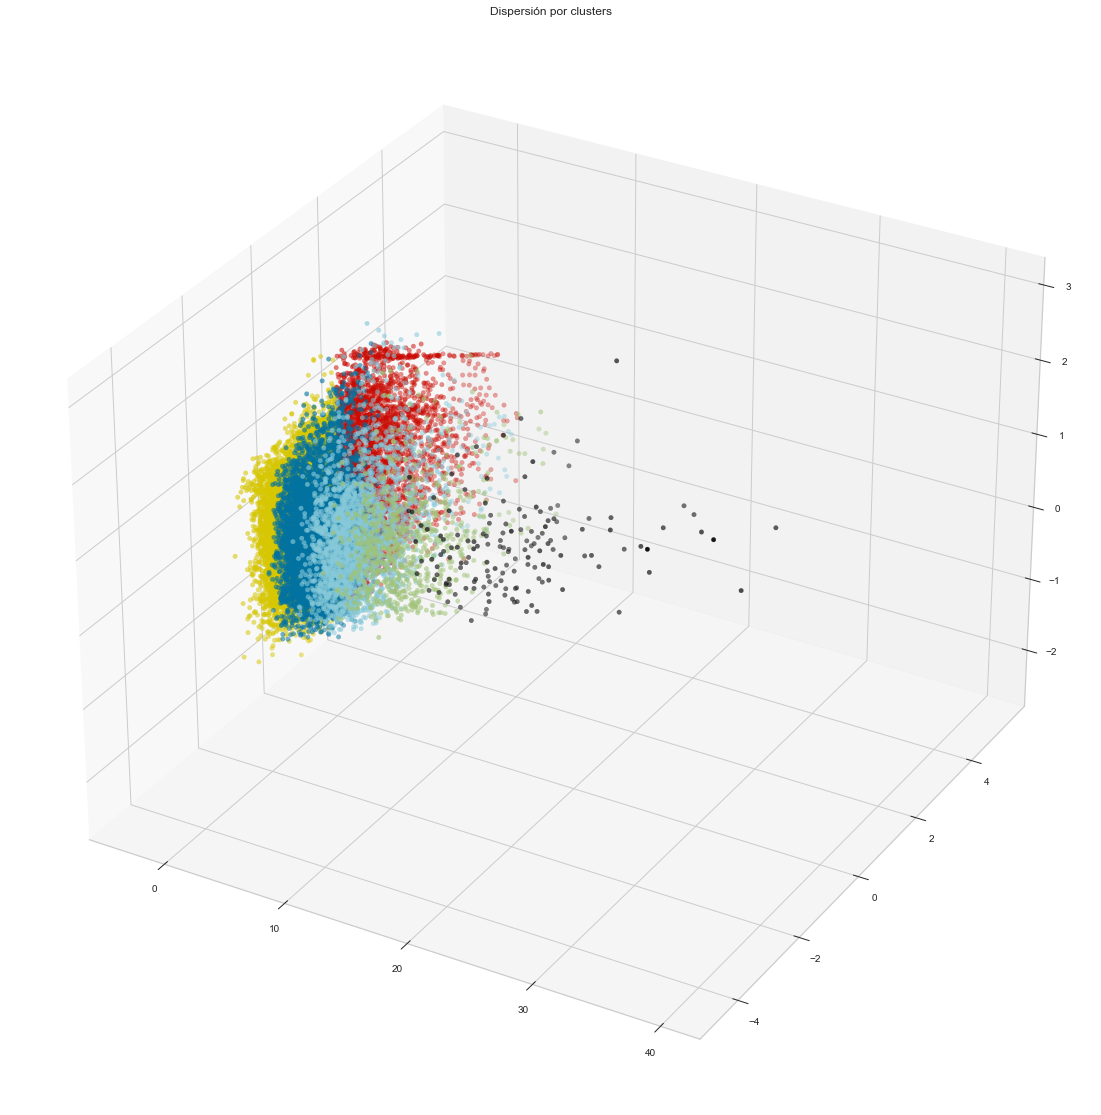

In [42]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection="3d")

ax.scatter3D(X1["PC1"], X1["PC2"], X1["PC3"], color=X1["cluster"].map(colors))
plt.title("Dispersión por clusters")
plt.show()

In [43]:
minmax = MinMaxScaler()

pca_cols = [col for col in X1. columns if col.startswith("PC")]

X1.loc[:, pca_cols] = minmax.fit_transform(X1[pca_cols])

radar_chart(df=X1, columns=pca_cols, label="cluster", title="Comportamiento PCA + Cluster")

---

### Anexo

Código para crear una categoria que se llame otros:

```
top = data['departamento'].value_counts().nlargest(12).index
data['departamento'] = data['departamento'].where(data['departamento'].isin(top), other='Otros')
```
---

## Preprocesamiento

1. Partir los datos en entrenamiento y prueba.
2. Preprocesamiento de variables numéricas.
    * Detectar y tratar datos missing.
    * Detectar y tratar datos atípicos
    * Crear nuevas variables (interacciones entre las variables) -> `PolynomialFeatures`
    * Escalar los datos numéricos.
4. Preprocesamiento de variables categóricas.
    * Detectar y tratar datos missing.
    * Codificar las variables.

### Split

In [44]:
housing.head(2)

housing_median_age  total_rooms  total_bedrooms  population  households  \
0               41.00       880.00          129.00      322.00      126.00   
1               21.00      7099.00         1106.00     2401.00     1138.00   

   median_income  median_house_value ocean_proximity  
0           8.33           452600.00        NEAR BAY  
1           8.30           358500.00        NEAR BAY

In [45]:
price = housing.pop("median_house_value")

X_train, X_test, y_train, y_test = train_test_split(housing, price,
                                                    test_size=0.3, stratify=housing["ocean_proximity"])

In [46]:
print(f"En el set de entrenamiento hay {X_train.shape[0]} observaciones, y {X_train.shape[1]} variables.")
print(f"En el set de prueba hay {X_test.shape[0]} observaciones, y {X_test.shape[1]} variables.")

En el set de entrenamiento hay 14448 observaciones, y 7 variables.
En el set de prueba hay 6192 observaciones, y 7 variables.


### Preprocesamiento de las variables numéricas

#### Detectar y tratar los datos missing

In [66]:
X_train.isna().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        141
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [56]:
imputer = X_train.groupby(by="total_rooms", as_index=False)["total_bedrooms"].median()
imputer.to_csv("models/imputer.csv", index=False)
imputer = None

In [67]:
imputer = pd.read_csv("models/imputer.csv")

for idx, row in imputer.iterrows():
    aux = dict(row)
    X_train.loc[(X_train["total_rooms"] == aux["total_rooms"]) &
                (X_train["total_bedrooms"].isna()), "total_bedrooms"] = aux["total_bedrooms"]

In [69]:
X_train[X_train["total_bedrooms"].isna()]

housing_median_age  total_rooms  total_bedrooms  population  \
13597               44.00       376.00             NaN      273.00   
1350                 5.00      5526.00             NaN     3207.00   
8383                26.00      3543.00             NaN     2742.00   
2826                52.00       154.00             NaN       37.00   
11351               20.00      4413.00             NaN     4818.00   
18346               20.00     11709.00             NaN     7604.00   
6298                22.00      6269.00             NaN     5587.00   
3354                15.00      5343.00             NaN     2503.00   
6814                32.00      4275.00             NaN     2812.00   
13933               29.00      4610.00             NaN     1569.00   
18246                4.00      2292.00             NaN     1050.00   
3912                18.00      5862.00             NaN     3161.00   
4046                24.00      4394.00             NaN     1443.00   
10385               15.00      5736.00             NaN     2529.00   
20267               18.00      3620.00             NaN     3171.00   
16885               26.00      3281.00             NaN     1145.00   
12101               13.00      7910.00             NaN     3382.00   
9149                17.00     10267.00             NaN     4956.00   
3485                16.00      8879.00             NaN     3468.00   
3778                24.00      6347.00             NaN     2945.00   
17825                9.00      6751.00             NaN     4240.00   
13015               11.00      4415.00             NaN     1520.00   
15397               12.00      4992.00             NaN     2106.00   

       households  median_income ocean_proximity  
13597      107.00           2.29          INLAND  
1350      1012.00           4.08          INLAND  
8383       951.00           2.55       <1H OCEAN  
2826        16.00          10.03          INLAND  
11351     1063.00           2.86       <1H OCEAN  
18346     3589.00           1.90        NEAR BAY  
6298      1251.00           3.82       <1H OCEAN  
3354       902.00           3.60          INLAND  
6814      1012.00           3.35       <1H OCEAN  
13933      592.00           2.77          INLAND  
18246      584.00           4.80        NEAR BAY  
3912      1280.00           3.11       <1H OCEAN  
4046       528.00          11.30       <1H OCEAN  
10385      762.00           6.41       <1H OCEAN  
20267      779.00           3.34      NEAR OCEAN  
16885      480.00           6.36      NEAR OCEAN  
12101     1176.00           5.56          INLAND  
9149      1483.00           5.51       <1H OCEAN  
3485      1200.00           8.11       <1H OCEAN  
3778      1492.00           3.35       <1H OCEAN  
17825     1438.00           5.34       <1H OCEAN  
13015      627.00           3.23          INLAND  
15397      801.00           6.21       <1H OCEAN

In [70]:
X_train[X_train["total_rooms"] == 154.0]

housing_median_age  total_rooms  total_bedrooms  population  households  \
2826               52.00       154.00             NaN       37.00       16.00   

      median_income ocean_proximity  
2826          10.03          INLAND

In [72]:
# Eliminamos nuestra variable dependiente de la lista numerical_features

numerical_features.remove("median_house_value")

knn_imputer = KNNImputer().fit(X_train[numerical_features])

X_train.loc[:, numerical_features] = knn_imputer.transform(X_train[numerical_features])

In [74]:
for idx, row in imputer.iterrows():
    aux = dict(row)
    X_test.loc[(X_test["total_rooms"] == aux["total_rooms"]) &
               (X_test["total_bedrooms"].isna()), "total_bedrooms"] = aux["total_bedrooms"]

X_test.loc[:, numerical_features] = knn_imputer.transform(X_test[numerical_features])

#### Detectar y tratar los Outliers

Recordemos que ninguna variable numérica se distribuye de manera normal, por tanto, debemos detectar los atípicos utilizando el **IQR**.

In [76]:
q3 = X_train.quantile(0.75)
q1 = X_train.quantile(0.25)

iqr = q3 - q1

li = (q1 - 1.5 * iqr).to_dict()
ls = (q3 + 1.5 * iqr).to_dict()

In [78]:
import json

li_file = open("models/li.json", "w")
li_file = json.dump(li, li_file)

ls_file = open("models/ls.json", "w")
ls_file = json.dump(ls, ls_file)

In [79]:
li = json.load(open("models/li.json", "r"))
ls = json.load(open("models/ls.json", "r"))

In [80]:
for column in numerical_features:
    X_train[f"{column}_outlier"] = X_train[column].apply(lambda x: 0 if  li[column] <= x <= ls[column] else 1)

In [85]:
for column in numerical_features:
    X_test[f"{column}_outlier"] = X_test[column].apply(lambda x: 0 if  li[column] <= x <= ls[column] else 1)

##### Tratamiento 1 - Eliminar

In [ ]:
# Eliminando los datos atípicos en una sola columna

idx = X_train[X_train["households_outlier"] == 1].index.tolist()

X_train.drop(index=idx, axis=0, inplace=True)
print(f"Se han eliminado {len(idx)} observaciones.")

In [82]:
# Eliminamos los datos atípicos para todas las columnas

outlier_features = [col for col in X_train.columns if col.endswith("outlier")]

for col in outlier_features:
    idx = X_train[X_train[col] == 1].index.tolist()
    X_train = X_train.drop(index=idx, axis=0)
    print(f"Se han eliminado {len(idx)} observaciones.")

Se han eliminado 0 observaciones.
Se han eliminado 907 observaciones.
Se han eliminado 203 observaciones.
Se han eliminado 190 observaciones.
Se han eliminado 8 observaciones.
Se han eliminado 429 observaciones.


In [86]:
for col in outlier_features:
    idx = X_test[X_test[col] == 1].index.tolist()
    X_test = X_test.drop(index=idx, axis=0)
    print(f"Se han eliminado {len(idx)} observaciones.")

Se han eliminado 0 observaciones.
Se han eliminado 375 observaciones.
Se han eliminado 106 observaciones.
Se han eliminado 64 observaciones.
Se han eliminado 1 observaciones.
Se han eliminado 167 observaciones.


##### Tratamiento 2 - Imputarlos

In [ ]:
# Volver los Outliers NaNs en una sola variable

X_train.loc[X_train["median_income_outlier"] == 1, "median_income"] = np.nan

In [ ]:
# Volver los Outliers NaNs para todas las variables

for outlier, numeric in zip(outlier_features, numerical_features):
    X_train.loc[X_train[outlier] == 1, numeric] = np.nan

X_train.loc[:, numerical_features] = knn_imputer.transform(X_train[numerical_features])

In [ ]:
for outlier, numeric in zip(outlier_features, numerical_features):
    X_test.loc[X_test[outlier] == 1, numeric] = np.nan

X_test.loc[:, numerical_features] = knn_imputer.transform(X_test[numerical_features])

### Escalar los datos numéricos

In [87]:
scaler = RobustScaler().fit(X_train[numerical_features])

X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [90]:
# Eliminamos las dummies de Outlier

X_train.drop(labels=outlier_features, axis=1, inplace=True)
X_test.drop(labels=outlier_features, axis=1, inplace=True)

### Preprocesamiento de variables categóricas

#### Codificar las variables

In [92]:
X_train = pd.get_dummies(data=X_train, columns=categorical_features)

X_test = pd.get_dummies(data=X_test, columns=categorical_features)

In [94]:
X_test.head()

housing_median_age  total_rooms  total_bedrooms  population  \
1404                 0.37        -0.55           -0.73       -0.70   
17799                0.11        -0.24           -0.57       -0.43   
2695                -0.37        -0.38           -0.41       -0.31   
2091                 1.00        -0.58           -0.36       -0.16   
6872                 0.42        -0.67           -0.64       -0.06   

       households  median_income  ocean_proximity_<1H OCEAN  \
1404        -0.72           0.78                          0   
17799       -0.46           1.66                          1   
2695        -0.42          -0.54                          0   
2091        -0.41          -1.06                          0   
6872        -0.56          -0.10                          1   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
1404                        0                       0   
17799                       0                       0   
2695                        1                       0   
2091                        1                       0   
6872                        0                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
1404                          1                           0  
17799                         0                           0  
2695                          0                           0  
2091                          0                           0  
6872                          0                           0